# Basic R

## Introduction

One cannot acquire a new programming language without investing numerous hours.
[R-Introduction](https://cran.r-project.org/doc/manuals/r-release/R-intro.pdf) is an official manual
maintained by the R core team.
It was the first document that I perused painstakingly when I began to learn R in 2005.
After so many years, this is still the best starting point for you to have a taste.

This lecture quickly sketches some key points of the manual, while you should carefully go over R-Introduction
after today's lecture.

## Help System

The help system is the first thing we must learn for a new language.
In R, if we know the exact name of a function and want to check its usage, we can either call `help(function_name)` or a single question mark `?function_name`.
If we do not know the exact function name, we can instead use the double question mark `??key_words`. It will provide a list of related function names from a fuzzy search.

**Example**: `?seq`, `??sequence`

## Vector

A *vector* is a collection of elements of the same type, say, integer, logical value, real number, complex number, characters or factor.
Unlike C, R does not require explicit type declaration.

 `<-` assigns the value on its right-hand side to a self-defined variable name on its left-hand side. `=` is an alternative for assignment, which I prefer.

 `c()`  combines two or more vectors into a long vector.


Binary arithmetic operations `+`, `-`, `*` and `\` are performed element by element.
So are the binary logical operations `&` `|` `!=`.

*Factor* is a categorical number. *Character* is text.

Missing values in R is represented as `NA` (Not Available). When some operations are not allowed, say, `log(-1)`, R returns  `NaN` (Not a Number).

Vector selection is specified in square bracket `a[ ]` by either positive integer or logical vector.

**Example**

Logical vector operation.

In [3]:
logi_1 = c(T,T,F)
logi_2 = c(F,T,T)

logi_12 = logi_1 & logi_2
print(logi_12)

[1] FALSE  TRUE FALSE


## Array and Matrix

An array is a table of numbers.  
A matrix is a 2-dimensional array.

* array arithmetic: element-by-element. Caution must be exercised in binary operations involving two objects of different length. This is error-prone.
* `%*%`, `solve`, `eigen`

**Example**

OLS estimation with one $x$ regressor and a constant.
Graduate textbook expresses the OLS in matrix form
$$\hat{\beta} = (X' X)^{-1} X'y.$$
To conduct OLS estimation in R, we literally translate the mathematical expression into code.

Step 1: We need data $Y$ and $X$ to run OLS. We simulate an artificial dataset.

Step 1: We need data $Y$ and $X$ to run OLS. We simulate an artificial dataset.

In [9]:
# simulate data
rm(list = ls( ) )
set.seed(111) # can be removed to allow the result to change

# set the parameters
n = 100
b0 = matrix(1, nrow = 2 )

# generate the data
e = rnorm(n)
X = cbind( 1, rnorm(n) )
Y = X %*% b0 + e

Step 2: translate the formula to code

In [10]:
bhat = solve( t(X) %*% X, t(X)%*% Y )

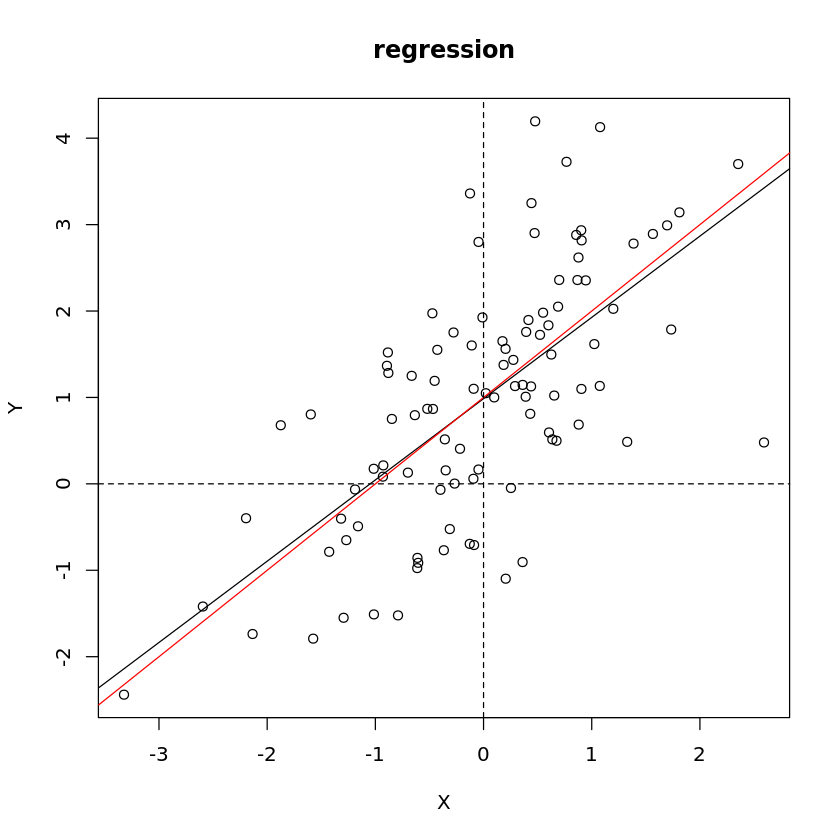

In [11]:
# plot
plot( y = Y, x = X[,2], xlab = "X", ylab = "Y", main = "regression")
abline( a= bhat[1], b = bhat[2])
abline( a = b0[1], b = b0[2], col = "red")
abline( h = 0, lty = 2)
abline( v = 0, lty = 2)

Step 4: In econometrics we are often interested in hypothesis testing.
The *t*-statistic is widely used.
To test the null $H_0: \beta_2 = 1$, we compute the associated *t*-statistic.
Again, this is a translation.
$$
t  =  \frac{\hat{\beta}_2 - \beta_{02}}{ \hat{\sigma}_{\hat{\beta}_2}  }
   =  \frac{\hat{\beta}_2 - \beta_{02}}{ \sqrt{ \left[ (X'X)^{-1} \hat{\sigma}^2 \right]_{22} } }.
$$
where $[\cdot]_{22}$ is the (2,2)-element of a matrix.